In [1]:
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image



In [2]:
df = pd.read_excel (r'/home/imad/Desktop/Becode/Project/challenge-mole/CLIN_DIA.xlsx')
df

,klin. Diagn.,id,nr,Histo performed,Diagnose red.,kat.Diagnose
0,Compound Nävus,d1,1,0,Compound Nevus,1
1,Compound Nävus,d2,2,0,Compound Nevus,1
2,Dysplastischer Nävus,d3,3,0,Compound Nevus,1
3,Compound Nävus,d4,4,0,Compound Nevus,1
4,Dermaler Nävus,d5,5,0,Compound Nevus,1
...,...,...,...,...,...,...
2995,Compound Nevus,f996,2996,0,Compound Nevus,1
2996,Compound Nevus,f997,2997,0,Compound Nevus,1
2997,Compound Nevus,f998,2998,0,Compound Nevus,1
2998,Compound Nevus,f999,2999,0,Compound Nevus,1


In [3]:
df = df[df["kat.Diagnose"] != 0]
df = df[df["kat.Diagnose"] != "?"]
df['kat.Diagnose'] = df['kat.Diagnose'].replace([1], 0).replace([2, 3], 1)
df["id"] = df["id"].apply(lambda x : x.upper())

df

,klin. Diagn.,id,nr,Histo performed,Diagnose red.,kat.Diagnose
0,Compound Nävus,D1,1,0,Compound Nevus,0
1,Compound Nävus,D2,2,0,Compound Nevus,0
2,Dysplastischer Nävus,D3,3,0,Compound Nevus,0
3,Compound Nävus,D4,4,0,Compound Nevus,0
4,Dermaler Nävus,D5,5,0,Compound Nevus,0
...,...,...,...,...,...,...
2995,Compound Nevus,F996,2996,0,Compound Nevus,0
2996,Compound Nevus,F997,2997,0,Compound Nevus,0
2997,Compound Nevus,F998,2998,0,Compound Nevus,0
2998,Compound Nevus,F999,2999,0,Compound Nevus,0


In [5]:
# images = os.listdir("Mole_Data")

# cancerous = []
# not_cancerous = []
# # image_index = []
# # for i in images:
# #     image_index.append(i)

# for i in range(len(images)):

#     try:
#         if df["kat.Diagnose"][i] == 0.0:
#             not_cancerous.append(images[i])
            
#         elif df["kat.Diagnose"][i] == 1.0:
#             cancerous.append(images[i])
#     except KeyError:
#         continue


In [5]:
# print(len(cancerous))
# print(len(not_cancerous))

In [6]:
# for i in cancerous:
#     x = Image.open("./Mole_Data/" + i)
#     x.save("./data/cancerous/" + i)

In [7]:
# for n in not_cancerous:
#     y = Image.open("./Mole_Data/" + n)
#     y.save("./data/not_cancerous/" + n)

In [8]:
# len(images[1])

In [9]:
# path = "/home/imad/Desktop/Becode/Project/challenge-mole/samples/F995.BMP" #/home/imad/Desktop/Becode/Project/challenge-mole/samples
path = "/home/imad/Desktop/Becode/Project/challenge-mole/Mole_Data/D900.BMP"
img = cv.imread(path)
cv.imshow('origin',img)
# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow('gray',gray)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
img.shape
# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# gray.shape

(387, 632, 3)

In [11]:
# canerous_set = np.load("/home/imad/Desktop/Becode/Project/challenge-mole/data/cancerous")
# canerous_set = np.load("/home/imad/Desktop/Becode/Project/challenge-mole/data/not_cancerous")

In [6]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [7]:
cancerous_set = load_images_from_folder("/home/imad/Desktop/Becode/Project/challenge-mole/data/cancerous")
not_cancerous_set = load_images_from_folder("/home/imad/Desktop/Becode/Project/challenge-mole/data/not_cancerous")
augmented = load_images_from_folder("/home/imad/Desktop/Becode/Project/challenge-mole/data/augmented")

In [8]:
# resize the images to (256, 256, 3)
# canerous_set = canerous_set.apply(lambda img : img = img.resize((256, 256)))

In [9]:
new_width = 256
new_height = 256
# dsize

cancerous_resized = []
not_cancerours_resized = []
for i in range(len(cancerous_set)):
    i = cancerous_set[i]
    # resize image
    i = cv.resize(i, dsize, interpolation = cv.INTER_NEAREST)
    cancerous_resized.append(i)




In [10]:
cancerous_resized[9].shape

(256, 256, 3)

In [11]:
not_cancerours_resized = []

for i in range(len(not_cancerous_set)):
    i = not_cancerous_set[i]
    # resize image
    i = cv.resize(i, dsize, interpolation = cv.INTER_NEAREST)
    not_cancerours_resized.append(i)

In [12]:
not_cancerours_resized[0].shape

(256, 256, 3)

In [13]:
augmented[0].shape

(256, 256, 3)

In [14]:
# contctnate data
cancerous = np.concatenate([cancerous_resized, augmented])
not_cancerous = not_cancerours_resized

In [15]:
cancerous = np.array(cancerous)
not_cancerous = np.array(not_cancerous)

Text(0, 0.5, 'number of samples')

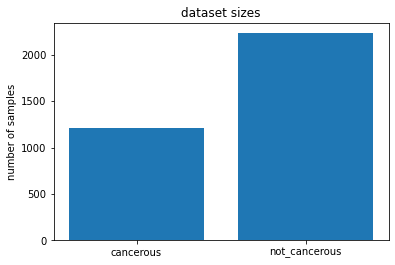

In [16]:
plt.bar([0,1], [cancerous.shape[0], not_cancerous.shape[0]])
plt.title('dataset sizes')
plt.xticks([0,1], ['cancerous', 'not_cancerous'])
plt.ylabel('number of samples')

In [17]:
max_samples = min(cancerous.shape[0], not_cancerous.shape[0])
# preprocessed_cancerous = cancerous[:max_samples].reshape(-1,256,256)
# preprocessed_not_cancerous = not_cancerous[:max_samples].reshape(-1,256,256)
preprocessed_cancerous = cancerous[:max_samples]
preprocessed_not_cancerous = not_cancerous[:max_samples]

Text(0, 0.5, 'number of samples')

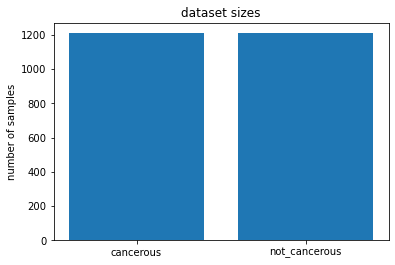

In [18]:
plt.bar([0,1], [preprocessed_cancerous.shape[0], preprocessed_not_cancerous.shape[0]])
plt.title('dataset sizes')
plt.xticks([0,1], ['cancerous', 'not_cancerous'])
plt.ylabel('number of samples')

In [19]:
canerous_set_labels = np.zeros((max_samples, 1))
not_canerous_set_labels = np.ones((max_samples, 1))

In [20]:
labels = np.concatenate([canerous_set_labels, not_canerous_set_labels])
drawings = np.concatenate([preprocessed_cancerous, preprocessed_not_cancerous])

# tensorflow wants a 4D tensor with (n_images, width, height, colour_depth)
print("Drawings shape before : ", drawings.shape)
# drawings = np.expand_dims(drawings, axis=4)
print("Drawings shape after : ", drawings.shape)
print("Label shape : ", labels.shape)


Drawings shape before :  (2420, 256, 256, 3)
Drawings shape after :  (2420, 256, 256, 3)
Label shape :  (2420, 1)


In [21]:
from sklearn.model_selection import train_test_split
from numpy import save
from keras import layers, models

train_drawings, test_drawings, train_labels, test_labels = train_test_split(
    drawings, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

print("train_drawings shape : ", train_drawings.shape)
print("test_drawings shape : ", test_drawings.shape)
print("train_labels shape : ", train_labels.shape)
print("test_labels shape : ", test_labels.shape)

train_drawings shape :  (1936, 256, 256, 3)
test_drawings shape :  (484, 256, 256, 3)
train_labels shape :  (1936, 1)
test_labels shape :  (484, 1)


In [22]:
# save numpy array as npy file
# define data
# save to npy file
save('train_drawings.npy', train_drawings)
save('test_drawings.npy', test_drawings)
save('train_labels.npy', train_labels)
save('test_labels.npy', test_labels)

In [31]:
# pixel width and height of our images
input_size = 256

# number of filters in the convnet layer
filters = 16

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size = (5, 5), activation='relu', input_shape=(input_size, input_size, 3)))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Conv2D(16, kernel_size = (5, 5), activation='relu', ))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 248, 248, 16)      12816     
_________________________________________________________________
flatten (Flatten)            (None, 984064)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               251920640 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_drawings, train_labels, epochs=10, 
                    validation_data=(test_drawings, test_labels))

Epoch 1/10


In [76]:
import cv2 as cv
from tensorflow.keras.models import load_model, model_from_json

import numpy as np

category = ["cancerous", "not_cancerous"]

model = load_model("./deployment/my_model.h5")
predict_value = model.predict([prepare("F1000.BMP")])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 248, 248, 16)      12816     
_________________________________________________________________
flatten (Flatten)            (None, 984064)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               251920640 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

In [3]:
model.get_weights()

In [4]:
json_string = model.to_json()

In [6]:
json_string

In [7]:
model_ar = model_from_json(json_string)

In [8]:
model_ar.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 248, 248, 16)      12816     
_________________________________________________________________
flatten (Flatten)            (None, 984064)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               251920640 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

In [77]:
img = cv.imread("./deployment/F1000.BMP")
img = np.array(img)
img = cv.resize(img, (256,256), interpolation = cv.INTER_NEAREST)# , interpolation = cv.INTER_NEAREST

In [85]:
predi = model.predict(prepare("./deployment/F1000.BMP"))

In [87]:
predi

array([[0.3506584 , 0.64934164]], dtype=float32)

In [88]:
print(category[int(predi[0][0])])

cancerous


In [14]:
x = "./deployment/F1000.BMP"
img = cv.imread(x, cv.IMREAD_COLOR)
img

In [74]:
from efficientnet.tfkeras import EfficientNetB4
from keras.initializers import glorot_uniform
with open("./deployment/model.json", "r") as json_file:
    json_savedmodel = json_file.read()
model_j = model_from_json(json_savedmodel)
model_j.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b0 (Functional) (None, 7, 7, 1280)        4049564   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 4,214,302
Trainable params: 4,172,030
Non-trainable params: 42,272
_________________________________________

In [70]:
new_img = prediction_resault("./deployment/F1000.BMP").shape
new_img

(1, 256, 256, 3)